In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
import warnings
warnings.filterwarnings('ignore')
import math

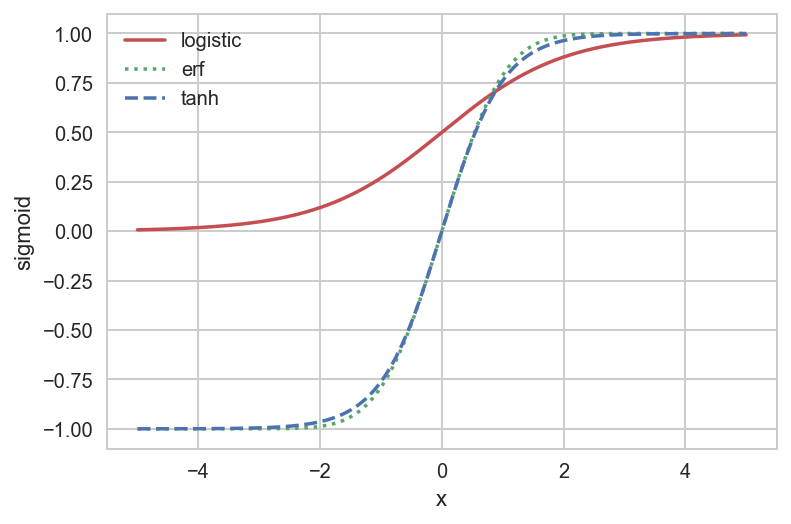

In [3]:
xx = np.linspace(-5, 5, 1000)

plt.plot(xx, 1/(1+np.exp(-xx)), 'r-', label="logistic")
plt.plot(xx, sp.special.erf(0.5*np.sqrt(np.pi)*xx), 'g:', label="erf")
plt.plot(xx, np.tanh(xx), 'b--', label="tanh")

plt.ylim([-1.1, 1.1])
plt.legend(loc=2)
plt.xlabel("x")
plt.ylabel("sigmoid")
plt.show()

$ \text{odds ratio} = \dfrac{\theta}{1-\theta} [0, \infty] $

In [10]:
t = 0
odd_ratio = lambda t : t / (1-t) # 0 ~ infinity
log_odd_ratio = lambda t: np.log(t / (1-t)) # infinity ~ infinity

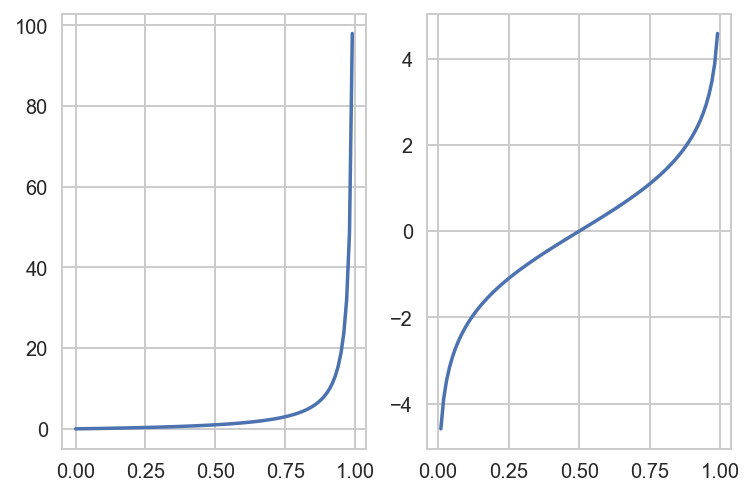

In [15]:
xx = np.linspace(0, 1, 100)
plt.subplot(121)
plt.plot(xx, odd_ratio(xx)) 
plt.subplot(122) 
plt.plot(xx, log_odd_ratio(xx));

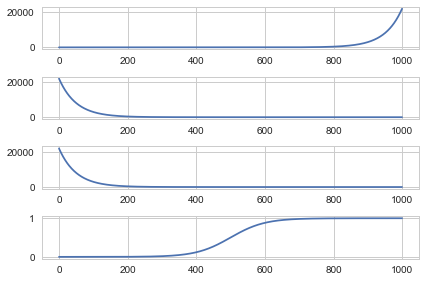

In [14]:
xx = np.linspace(-10, 10, 1000)
plt.subplot(4,1,1)
plt.plot(np.exp(xx))

plt.subplot(4,1,2) 
plt.plot(np.exp(-xx))

plt.subplot(4,1,3)
plt.plot(1+np.exp(-xx))

plt.subplot(4,1,4)
plt.plot(1/(1+np.exp(-xx)))

plt.tight_layout(pad=1, h_pad=1)
plt.show()

In [15]:
np.log(2)

0.6931471805599453

In [20]:
math.e ** 0.6931471805599453

1.9999999999999998

In [21]:
np.exp(0.6931471805599453)

2.0

$$
a = w^T x \\
\log(\dfrac{\theta}{1-\theta}) = a \\
\dfrac{\theta}{1-\theta} = e^a \\
\theta = (1-\theta) e^a \\
\theta = e^a - \theta e^a \\ 
e^a = \theta + \theta e^a \\
e^a = \theta(1 + e^a) \\
\theta = \dfrac{e^a}{1 + e^a } \\ 
\theta = \dfrac{ \dfrac{e^a}{e^a}}{ \dfrac{1 + e^a}{e^a} } \\ 
\theta = \dfrac{1}{1 + e^{-a}}
$$

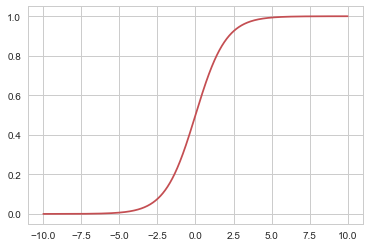

In [33]:
xx = np.linspace(-10, 10, 1000)
y = 1 / (1 + np.exp(-xx))
plt.plot(xx, y, 'r')

In [35]:
def fun1(z, y):
    return 1/(1+np.exp(-z))**y * (1- 1/(1+np.exp(-z))**(1-y) )

In [76]:
datas = np.dot(X, logit_res.params)

In [71]:
datas = np.sort(datas)

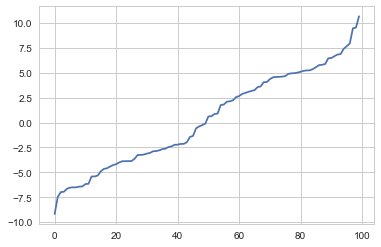

In [72]:
plt.plot(datas)

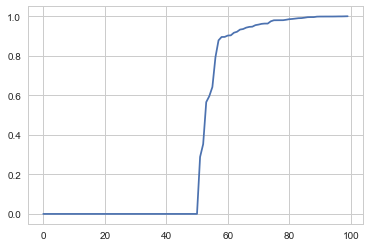

In [75]:
datas = fun1(datas, y)
datas = np.sort(datas)
plt.plot(datas)

In [111]:
def fun2(z, y): 
    t = 1/(1+np.exp(-z)) 
    return np.log(np.product( t**y * (1- t)**(1-y) ))

def fun3(z, y):
    t = 1 / (1 + np.exp(-z)) 
    t2 = np.exp(-z) / (1+np.exp(-z))
    return np.sum(y * np.log(t) + (1-y)* np.log(t2))

def fun4(x, y, w):
    t = 1 / (1 + np.exp(-(np.dot(x, w)))) 
    
    return np.dot((y - t), x)
    return np.sum( np.dot((y - t), x))

In [112]:
fun2(datas, y), fun3(datas, y)

(-16.084355200413036, -16.084355200413036)

In [113]:
fun4(X, y, logit_res.params)

array([ 9.43689571e-16, -4.28040495e-16])

In [36]:
from sklearn.datasets import make_classification

X0, y = make_classification(n_features=1, n_redundant=0, n_informative=1, 
                            n_clusters_per_class=1, random_state=4)
X = sm.add_constant(X0)

In [119]:
np.min(X0), np.max(X0), np.bincount(y)

(-2.2239794794159113, 2.458328250143664, array([49, 51]))

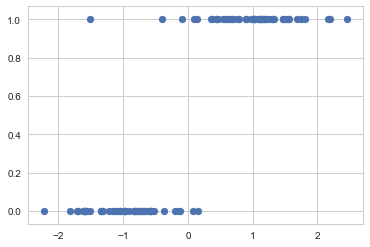

In [37]:
plt.scatter(X0, y)

In [38]:
# chisqprob 함수가 없다는 오류가 발생하면 다음 두 줄을 실행한다.
from scipy import stats
stats.chisqprob = lambda chisq, df: stats.chi2.sf(chisq, df)

logit_mod = sm.Logit(y, X)
logit_res = logit_mod.fit(disp=0)
print(logit_res.summary())

                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                  100
Model:                          Logit   Df Residuals:                       98
Method:                           MLE   Df Model:                            1
Date:                Thu, 19 Apr 2018   Pseudo R-squ.:                  0.7679
Time:                        11:42:14   Log-Likelihood:                -16.084
converged:                       True   LL-Null:                       -69.295
                                        LLR p-value:                 5.963e-25
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2515      0.477      0.527      0.598      -0.683       1.186
x1             4.2382      0.902      4.699      0.000       2.470       6.006


array([0.25146938, 4.23823801])

In [135]:
def gus(x, mu=0):
    mu = mu
    var = 1 
    return 1/(np.sqrt(2 * np.pi * var)) * np.exp(- (x-mu)**2 / 2*var )

def mle(x): 
    var = 1 
    return 1/len(x) * np.sum(x)

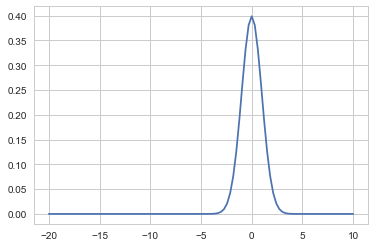

In [136]:
xx = np.linspace(-20, 10, 100)
plt.plot(xx, gus(xx))

In [145]:
sp.stats.skew(gus(xx))

2.928546603075087

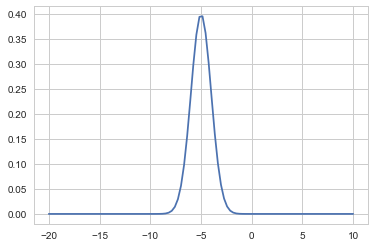

In [144]:
plt.plot(xx, gus(xx, -4.99))

In [128]:
mle(xx)

-4.999999999999999

In [159]:
np.array([2,4,3,1]) * 1/4 

array([0.5 , 1.  , 0.75, 0.25])

In [156]:
np.array([2,3,5,3]) * 1/6

array([0.33333333, 0.5       , 0.83333333, 0.5       ])

In [168]:
2/3

0.6666666666666666

In [170]:
np.random.seed(0)
X0 = np.random.multinomial(10, [0.3, 0.5, 0.1, 0.1], size=4)
X1 = np.random.multinomial(8, [0.1, 0.1, 0.35, 0.45], size=6)
X = np.vstack([X0, X1])
y = np.array([0,0,0,0,1,1,1,1,1,1])
print(X)
print(y)

[[3 4 1 2]
 [3 5 1 1]
 [3 3 0 4]
 [3 4 1 2]
 [1 2 1 4]
 [0 0 5 3]
 [1 2 4 1]
 [1 1 4 2]
 [0 1 2 5]
 [2 1 2 3]]
[0 0 0 0 1 1 1 1 1 1]


In [172]:
from sklearn.naive_bayes import MultinomialNB
model_mult = MultinomialNB().fit(X, y)

model_mult.classes_ 
model_mult.class_count_ 
np.exp(model_mult.class_log_prior_)

array([0.4, 0.6])

In [173]:
fc = model_mult.feature_count_
fc

array([[12., 16.,  3.,  9.],
       [ 5.,  7., 18., 18.]])

In [174]:
fc / np.repeat(fc.sum(axis=1)[:, np.newaxis], 4, axis=1)

array([[0.3       , 0.4       , 0.075     , 0.225     ],
       [0.10416667, 0.14583333, 0.375     , 0.375     ]])

In [179]:
fc[0] /40

array([0.3  , 0.4  , 0.075, 0.225])

In [180]:
fc[1] /48

array([0.10416667, 0.14583333, 0.375     , 0.375     ])

In [188]:
(fc + model_mult.alpha) /  \
(np.repeat(fc.sum(axis=1)[:, np.newaxis], 4, axis=1) +  \
 model_mult.alpha * X.shape[1])

array([[0.29545455, 0.38636364, 0.09090909, 0.22727273],
       [0.11538462, 0.15384615, 0.36538462, 0.36538462]])

In [202]:
X = np.array([ [2, 1, 0],[1, 1, 0], [0, 0, 1]])
y = np.array([0, 0, 1])
X, y

(array([[2, 1, 0],
        [1, 1, 0],
        [0, 0, 1]]), array([0, 0, 1]))

In [203]:
from sklearn.naive_bayes import MultinomialNB
model_mult = MultinomialNB().fit(X, y)

model_mult.classes_ 

array([0, 1])

In [204]:
model_mult.class_count_ 

array([2., 1.])

In [205]:
np.exp(model_mult.class_log_prior_)

array([0.66666667, 0.33333333])

In [206]:
fc = model_mult.feature_count_
fc

array([[3., 2., 0.],
       [0., 0., 1.]])

In [215]:
fc / np.repeat(fc.sum(axis=1)[:, np.newaxis], 3, axis=1)

array([[0.6, 0.4, 0. ],
       [0. , 0. , 1. ]])

In [230]:
theta = (fc + model_mult.alpha) / \
(np.repeat(fc.sum(axis=1)[:, np.newaxis], 3, axis=1) + model_mult.alpha * X.shape[1])
theta

array([[0.5  , 0.375, 0.125],
       [0.25 , 0.25 , 0.5  ]])

In [222]:
fc[0] / fc[0].sum()

array([0.6, 0.4, 0. ])

In [223]:
fc[1] / fc[1].sum()

array([0., 0., 1.])

In [227]:
(fc[0] + 1) / (fc[0].sum() + 1 * 3)

array([0.5  , 0.375, 0.125])

In [228]:
(fc[1] + 1) / (fc[1].sum() + 1 * 3)

array([0.25, 0.25, 0.5 ])

In [231]:
x_new = np.array([0, 0, 2])

In [235]:
(theta**x_new)

array([[1.      , 1.      , 0.015625],
       [1.      , 1.      , 0.25    ]])

In [237]:
(theta**x_new).prod(axis=1) * 

array([0.015625, 0.25    ])

In [239]:
np.random.seed(0)
X0 = np.random.multinomial(10, [0.3, 0.5, 0.1, 0.1], size=4)
X1 = np.random.multinomial(8, [0.1, 0.1, 0.35, 0.45], size=6)
X = np.vstack([X0, X1])
y = np.array([0,0,0,0,1,1,1,1,1,1])
print(X)
print(y)

[[3 4 1 2]
 [3 5 1 1]
 [3 3 0 4]
 [3 4 1 2]
 [1 2 1 4]
 [0 0 5 3]
 [1 2 4 1]
 [1 1 4 2]
 [0 1 2 5]
 [2 1 2 3]]
[0 0 0 0 1 1 1 1 1 1]


In [241]:
from sklearn.naive_bayes import MultinomialNB
model_mult = MultinomialNB().fit(X, y)
model_mult.classes_

array([0, 1])

In [242]:
model_mult.class_count_

array([4., 6.])

In [243]:
np.exp(model_mult.class_log_prior_)

array([0.4, 0.6])

In [244]:
fc = model_mult.feature_count_
fc

array([[12., 16.,  3.,  9.],
       [ 5.,  7., 18., 18.]])

In [245]:
fc / np.repeat(fc.sum(axis=1)[:, np.newaxis], 4, axis=1)

array([[0.3       , 0.4       , 0.075     , 0.225     ],
       [0.10416667, 0.14583333, 0.375     , 0.375     ]])

In [246]:
(fc + model_mult.alpha) / (np.repeat(fc.sum(axis=1)[:, np.newaxis], 4, axis=1) + model_mult.alpha * X.shape[1])

array([[0.29545455, 0.38636364, 0.09090909, 0.22727273],
       [0.11538462, 0.15384615, 0.36538462, 0.36538462]])

In [247]:
theta = np.exp(model_mult.feature_log_prob_)
theta

array([[0.29545455, 0.38636364, 0.09090909, 0.22727273],
       [0.11538462, 0.15384615, 0.36538462, 0.36538462]])

In [249]:
x_new = np.array([10, 10, 10, 10])

In [265]:
p = (theta**x_new).prod(axis=1) * np.exp(model_mult.class_log_prior_)
p / p.sum()

array([0.38848858, 0.61151142])

In [260]:
model_mult.predict_proba([x_new])

array([[0.38848858, 0.61151142]])

In [266]:
(theta**x_new).prod(axis=1)

array([5.32617695e-27, 5.58921283e-27])

In [268]:
X = np.array([[1, 1, 0],
             [1, 0, 0],
             [0, 0, 1],
             [0, 1, 1]])
y = np.array([0, 0, 1, 1])
x_new = np.array([[1, 0, 0]])

In [269]:
from sklearn.naive_bayes import MultinomialNB
model_mult = MultinomialNB().fit(X, y)
model_mult.classes_

array([0, 1])

In [270]:
model_mult.class_count_

array([2., 2.])

In [274]:
fc = model_mult.feature_count_
fc

array([[2., 1., 0.],
       [0., 1., 2.]])

In [292]:
fc / np.repeat(fc.sum(axis=1)[:, np.newaxis] ,3, axis=1)

array([[0.66666667, 0.33333333, 0.        ],
       [0.        , 0.33333333, 0.66666667]])

In [295]:
theta = (fc+1) / \
(np.repeat(fc.sum(axis=1)[:, np.newaxis] ,3, axis=1) + 3)
theta 

array([[0.5       , 0.33333333, 0.16666667],
       [0.16666667, 0.33333333, 0.5       ]])

In [301]:
(theta**x_new)

array([[0.5       , 1.        , 1.        ],
       [0.16666667, 1.        , 1.        ]])

In [303]:
theta

array([[0.5       , 0.33333333, 0.16666667],
       [0.16666667, 0.33333333, 0.5       ]])

In [300]:
(theta**x_new).prod(axis=1)

array([0.5       , 0.16666667])

In [305]:
0.5*0.5 + 0.1667*0.5

0.33335

In [312]:
0.5 * 0.5 / (4/12)

0.75

In [307]:
0.1667 * 0.5 / 0.335 

0.2488059701492537

In [313]:
4/12

0.3333333333333333

In [309]:
(3/216 * 0.5) / (4/432)

0.75

In [310]:
6**3

216

In [314]:
np.log2(40)

5.321928094887363

In [319]:
np.log2(5) + 3

5.321928094887362

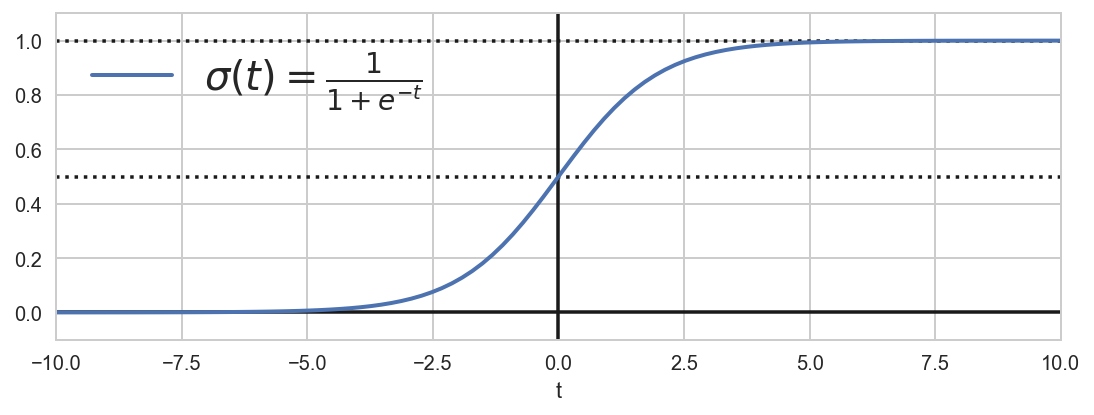

In [16]:
t = np.linspace(-10, 10, 100)
sig = 1 / (1 + np.exp(-t))
plt.figure(figsize=(9, 3))
plt.plot([-10, 10], [0, 0], "k-")
plt.plot([-10, 10], [0.5, 0.5], "k:")
plt.plot([-10, 10], [1, 1], "k:")
plt.plot([0, 0], [-1.1, 1.1], "k-")
plt.plot(t, sig, "b-", linewidth=2, label=r"$\sigma(t) = \frac{1}{1 + e^{-t}}$")
plt.xlabel("t")
plt.legend(loc="upper left", fontsize=20)
plt.axis([-10, 10, -0.1, 1.1]) 
plt.show()


In [17]:
from sklearn import datasets
iris = datasets.load_iris()
list(iris.keys())

['data', 'target', 'target_names', 'DESCR', 'feature_names']

In [18]:
X = iris["data"][:, 3:]  # 꽃잎 넓이
y = (iris["target"] == 2).astype(np.int)  # Iris-Virginica이면 1 아니면 0

In [21]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=42, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

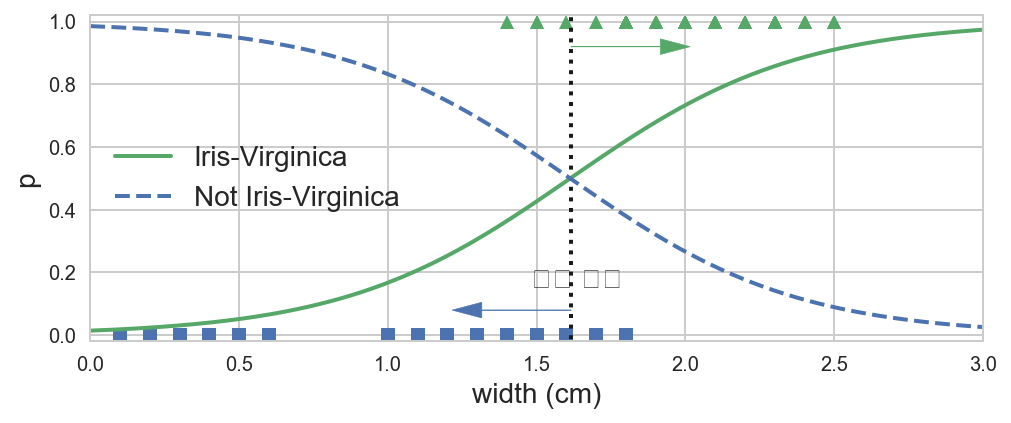

In [23]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)
decision_boundary = X_new[y_proba[:, 1] >= 0.5][0]

plt.figure(figsize=(8, 3))
plt.plot(X[y==0], y[y==0], "bs")
plt.plot(X[y==1], y[y==1], "g^")
plt.plot([decision_boundary, decision_boundary], [-1, 2], "k:", linewidth=2)
plt.plot(X_new, y_proba[:, 1], "g-", linewidth=2, label="Iris-Virginica")
plt.plot(X_new, y_proba[:, 0], "b--", linewidth=2, label="Not Iris-Virginica")

plt.text(decision_boundary+0.02, 0.15, "결정 경계", fontsize=14, color="k", ha="center")
plt.arrow(decision_boundary, 0.08, -0.3, 0, head_width=0.05, head_length=0.1, fc='b', ec='b')
plt.arrow(decision_boundary, 0.92, 0.3, 0, head_width=0.05, head_length=0.1, fc='g', ec='g')
plt.xlabel("width (cm)", fontsize=14)
plt.ylabel("p", fontsize=14)
plt.legend(loc="center left", fontsize=14)
plt.axis([0, 3, -0.02, 1.02]) 
plt.show()

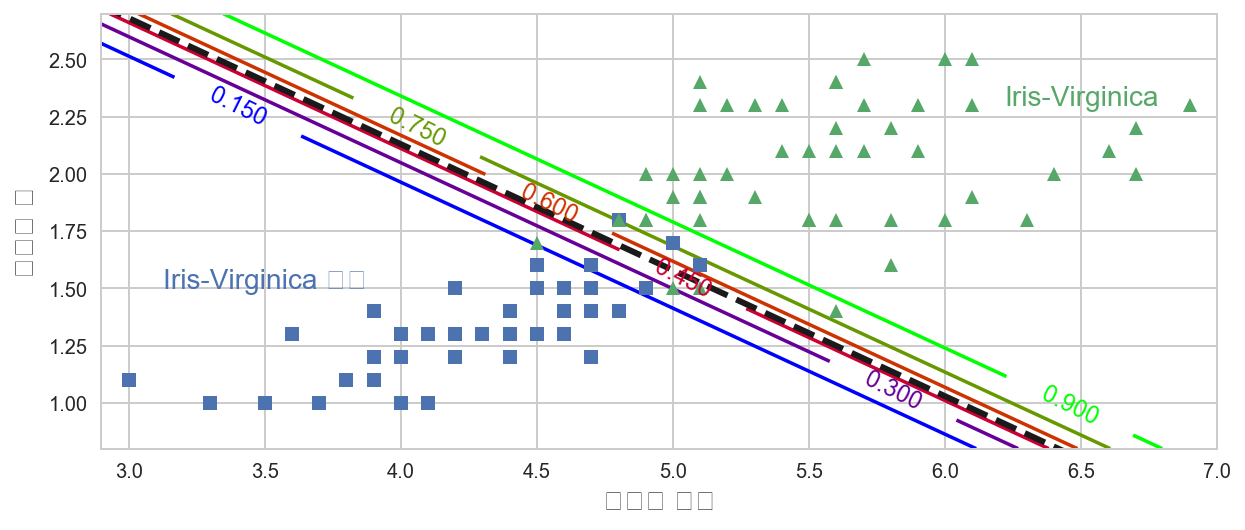

In [36]:
from sklearn.linear_model import LogisticRegression

X = iris["data"][:, (2, 3)]  # petal length, petal width
y = (iris["target"] == 2).astype(np.int)

log_reg = LogisticRegression(C=10**10, random_state=42)
log_reg.fit(X, y)

x0, x1 = np.meshgrid(
        np.linspace(2.9, 7, 500).reshape(-1, 1),
        np.linspace(0.8, 2.7, 200).reshape(-1, 1),
    )

X_new = np.c_[x0.ravel(), x1.ravel()]

y_proba = log_reg.predict_proba(X_new)


plt.figure(figsize=(10, 4))
plt.plot(X[y==0, 0], X[y==0, 1], "bs")
plt.plot(X[y==1, 0], X[y==1, 1], "g^")


zz = y_proba[:, 1].reshape(x0.shape)
contour = plt.contour(x0, x1, zz, cmap=plt.cm.brg)


left_right = np.array([2.9, 7])
boundary = -(log_reg.coef_[0][0] * left_right + log_reg.intercept_[0]) / log_reg.coef_[0][1]

plt.clabel(contour, inline=1, fontsize=12)
plt.plot(left_right, boundary, "k--", linewidth=3)
plt.text(3.5, 1.5, "Iris-Virginica 아님", fontsize=14, color="b", ha="center")
plt.text(6.5, 2.3, "Iris-Virginica", fontsize=14, color="g", ha="center")
plt.xlabel("꽃잎의 길이", fontsize=14)
plt.ylabel("꽃잎의 폭", fontsize=14)
plt.axis([2.9, 7, 0.8, 2.7]) 
plt.show()

In [37]:
X = iris["data"][:, (2, 3)]  # 꽃잎 길이, 꽃잎 넓이
y = iris["target"]

softmax_reg = LogisticRegression(multi_class="multinomial",solver="lbfgs", C=10, random_state=42)
softmax_reg.fit(X, y)

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=1, penalty='l2', random_state=42, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

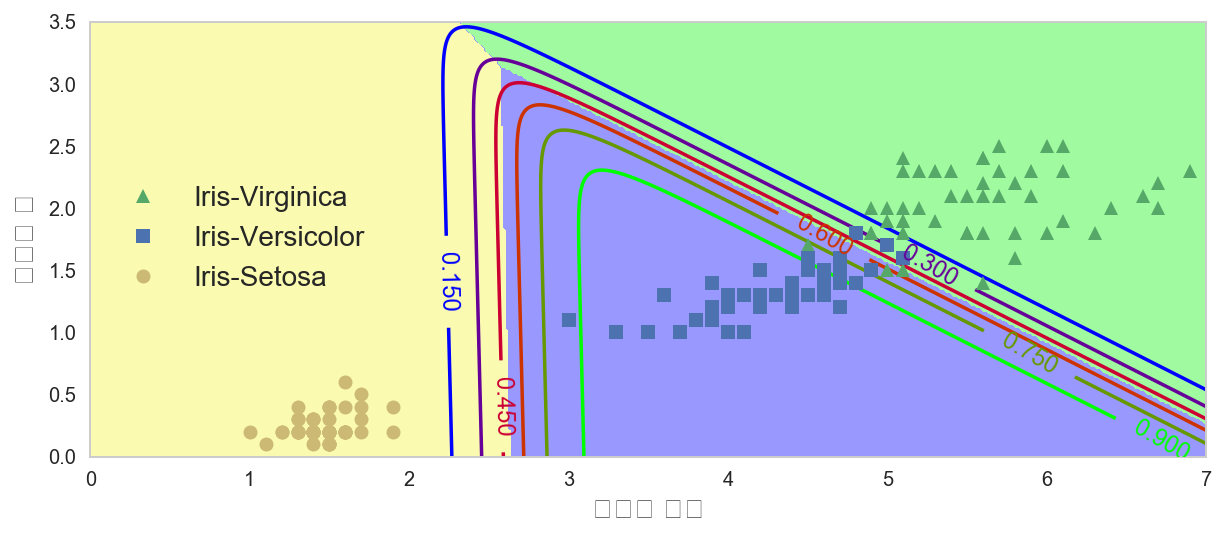

In [38]:
x0, x1 = np.meshgrid(
        np.linspace(0, 8, 500).reshape(-1, 1),
        np.linspace(0, 3.5, 200).reshape(-1, 1),)

X_new = np.c_[x0.ravel(), x1.ravel()]


y_proba = softmax_reg.predict_proba(X_new)
y_predict = softmax_reg.predict(X_new)

zz1 = y_proba[:, 1].reshape(x0.shape)
zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(10, 4))
plt.plot(X[y==2, 0], X[y==2, 1], "g^", label="Iris-Virginica")
plt.plot(X[y==1, 0], X[y==1, 1], "bs", label="Iris-Versicolor")
plt.plot(X[y==0, 0], X[y==0, 1], "yo", label="Iris-Setosa")

from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])

plt.contourf(x0, x1, zz, cmap=custom_cmap)
contour = plt.contour(x0, x1, zz1, cmap=plt.cm.brg)

plt.clabel(contour, inline=1, fontsize=12)
plt.xlabel("꽃잎의 길이", fontsize=14)
plt.ylabel("꽃잎의 폭", fontsize=14)
plt.legend(loc="center left", fontsize=14)
plt.axis([0, 7, 0, 3.5]) 
plt.show()